In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
import joblib

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
# Count the number of duplicated rows in theDataFrame.
df.duplicated().sum()

220

In [5]:
# Remove duplicated rows from the DataFrame.
df.drop_duplicates(inplace=True)

# Reset the index of the DataFrame after removing duplicates and modify it in-place.
df.reset_index(drop=True, inplace=True)

In [6]:
# Calculate the number of missing values in each column of the Pandas DataFrame 'df'.
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Remove Missing rows from the DataFrame.
df.dropna(inplace=True)

# Reset the index of the DataFrame after removing duplicates and modify it in-place.
df.reset_index(drop=True, inplace=True)

In [8]:
# Display information about the DataFrame, including data types, non-null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 899.2+ KB


In [10]:
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [11]:
df[df['Airline'] == 'Jet Airways Business']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229
2904,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
5312,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
7254,Jet Airways Business,3/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490
9537,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285
10159,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209


In [12]:
# Clean the 'Airline' column in the DataFrame 'daf' by removing ' Premium economy' from the airline names.
# Update the 'Additional_Info' column to indicate 'Premium economy' for rows where the change is made.
# Return the modified DataFrame.
def clean(daf):
    if ' Premium economy' in daf['Airline']:
        # Replace ' Premium economy' with an empty string in the 'Airline' column.
        daf['Airline'] = daf['Airline'].replace(' Premium economy', '')
        # Update the 'Additional_Info' column to indicate 'Premium economy'.
        daf['Additional_Info'] = 'Premium economy'
    # Return the modified DataFrame.
    return daf

In [13]:
# Apply the 'clean' function element-wise along each row of the Pandas DataFrame 'df', 
# modifying the 'Airline' and 'Additional_Info' columns to handle 'Premium economy'.
# Create a copy of the DataFrame after the modifications.
df = df.apply(clean, axis=1).copy()

In [14]:
# Clean the 'Airline' column in the DataFrame 'daf' by removing ' Business' from the airline names.
# Update the 'Additional_Info' column to indicate 'Business class' for rows where the change is made.
# Return the modified DataFrame.
def cleann(daf):
    if ' Business' in daf['Airline']:
        # Replace ' Business' with an empty string in the 'Airline' column.
        daf['Airline'] = daf['Airline'].replace(' Business', '')
        # Update the 'Additional_Info' column to indicate 'Business class'.
        daf['Additional_Info'] = 'Business class'
    # Return the modified DataFrame.
    return daf

In [15]:
# Apply the 'cleann' function element-wise along each row of the Pandas DataFrame 'df',
# modifying the 'Airline' and 'Additional_Info' columns to handle 'Business class'.
# Create a copy of the DataFrame after the modifications.
df = df.apply(cleann, axis=1).copy()

In [16]:
df.Airline.value_counts()

Airline
Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: count, dtype: int64

In [17]:
# Find the indices of rows in the Pandas DataFrame 'df' where the 'Airline' column has the value 'Trujet'.
idx = df[df['Airline'] == 'Trujet'].index

In [18]:
# Drop rows from the Pandas DataFrame 'df' where the 'Airline' column has the value 'Trujet'.
df.drop(idx, axis=0, inplace=True)
# Reset the index of the DataFrame after dropping rows and modify it in-place
df.reset_index(drop=True, inplace=True)

<Axes: xlabel='Airline', ylabel='count'>

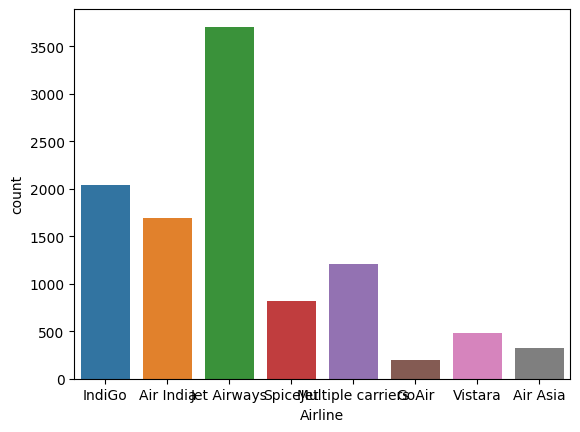

In [26]:
sns.countplot(df, x=df.Airline)

In [27]:
# Calculate the mean (average) 'Price' for each unique value in the 'Airline' column using Pandas groupby.
average_prices_by_airline = df.groupby('Airline')['Price'].mean()

Airline
Air Asia              5590.260188
Air India             9556.608028
GoAir                 5861.056701
IndiGo                5668.469897
Jet Airways          11674.724771
Multiple carriers    10908.228288
SpiceJet              4335.841718
Vistara               7808.596674
Name: Price, dtype: float64

In [28]:
sorted(df['Date_of_Journey'].unique())

['01/03/2019',
 '03/03/2019',
 '06/03/2019',
 '09/03/2019',
 '1/03/2019',
 '1/04/2019',
 '1/05/2019',
 '1/06/2019',
 '12/03/2019',
 '12/04/2019',
 '12/05/2019',
 '12/06/2019',
 '15/03/2019',
 '15/04/2019',
 '15/05/2019',
 '15/06/2019',
 '18/03/2019',
 '18/04/2019',
 '18/05/2019',
 '18/06/2019',
 '21/03/2019',
 '21/04/2019',
 '21/05/2019',
 '21/06/2019',
 '24/03/2019',
 '24/04/2019',
 '24/05/2019',
 '24/06/2019',
 '27/03/2019',
 '27/04/2019',
 '27/05/2019',
 '27/06/2019',
 '3/03/2019',
 '3/04/2019',
 '3/05/2019',
 '3/06/2019',
 '6/03/2019',
 '6/04/2019',
 '6/05/2019',
 '6/06/2019',
 '9/03/2019',
 '9/04/2019',
 '9/05/2019',
 '9/06/2019']

In [29]:
len(df['Date_of_Journey'].iloc[0])

10

In [30]:
# Iterate over unique dates in the 'Date_of_Journey' column of the DataFrame 'df'.
for i in df["Date_of_Journey"].unique().tolist():
    # Check if the length of the date string is less than 10.
    if len(i) < 10:
        # Print the date if its length is less than 10.
        print(i)

1/05/2019
9/06/2019
1/06/2019
9/05/2019
3/03/2019
6/03/2019
3/04/2019
6/05/2019
6/04/2019
3/06/2019
3/05/2019
9/03/2019
6/06/2019
1/04/2019
9/04/2019
1/03/2019


In [31]:
# Clean the 'Date_of_Journey' column in the DataFrame 'daf' by ensuring day values are zero-padded.
def clean_date(daf):
    # Extract the date string from the 'Date_of_Journey' column.
    date_str = daf['Date_of_Journey']
    
    # Split the date string into day, month, and year parts.
    parts = date_str.split('/')
    
    # Check if the day part has a single digit and, if so, zero-pad it.
    if len(parts[0]) == 1:
        parts[0] = '0' + parts[0]
    
    # Join the modified date parts back into a string.
    padded_date = '/'.join(parts)
    
    # Update the 'Date_of_Journey' column with the zero-padded date.
    daf['Date_of_Journey'] = padded_date
    
    # Return the modified DataFrame.
    return daf

In [32]:
# Applying the function to the 'Date_of_Journey' column
df = df.apply(clean_date, axis=1)

In [33]:
# Convert the 'Date_of_Journey' column in the Pandas DataFrame 'df' to datetime format,
# specifying the expected date format as '%d/%m/%Y' and handling errors by coercing them to NaT (Not a Time).
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format='%d/%m/%Y', errors="coerce")

In [34]:
# Extract and store the month names in the 'Month' column.
df["Month"] = df["Date_of_Journey"].dt.month_name()

# Extract and store the day names in the 'Day' column.
df["Day"] = df["Date_of_Journey"].dt.day_name()

In [37]:
df['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: count, dtype: int64

<Axes: xlabel='Source', ylabel='count'>

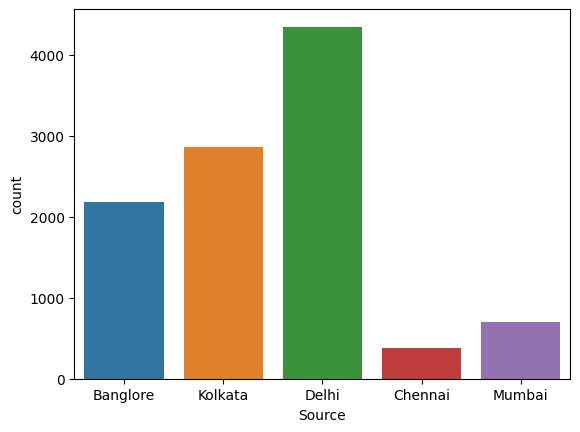

In [38]:
sns.countplot(df, x=df.Source)

In [29]:
df['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     696
Kolkata       381
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='count'>

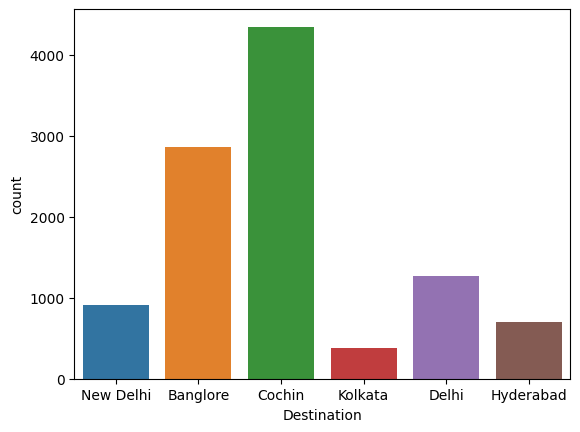

In [39]:
sns.countplot(df, x=df.Destination)

In [40]:
df['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → RPR → HYD → BLR       1
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → BBI → HYD             1
Name: count, Length: 127, dtype: int64

In [41]:
df[df['Route'] == 'DEL → BOM → COK']['Total_Stops'].value_counts()

Total_Stops
1 stop    2376
Name: count, dtype: int64

In [42]:
# Extract a substring from the 'Route' column of the Pandas DataFrame 'df', specifically characters at positions 3 to 5.
arrow = df['Route'].iloc[1][3:6]
arrow

' → '

In [43]:
# Apply a lambda function to split each string in the 'Route' column of the Pandas DataFrame 'df'
# using the substring 'arrow' as the delimiter.
df['Route'] = df['Route'].apply(lambda x: x.split(arrow))

In [44]:
# Calculate and return the number of stops based on the length of the input list 'r'.
def gt(r):
    # Calculate the number of stops as the length of 'r' minus 2.
    stops = len(r) - 2
    return stops

In [45]:
# Calculate the number of stops for each row in the Pandas DataFrame 'df'
# based on the length of the 'Route' list and store the result in the 'Total_Stops' column.
df['Total_Stops'] = df['Route'].apply(gt)

<Axes: xlabel='Total_Stops', ylabel='count'>

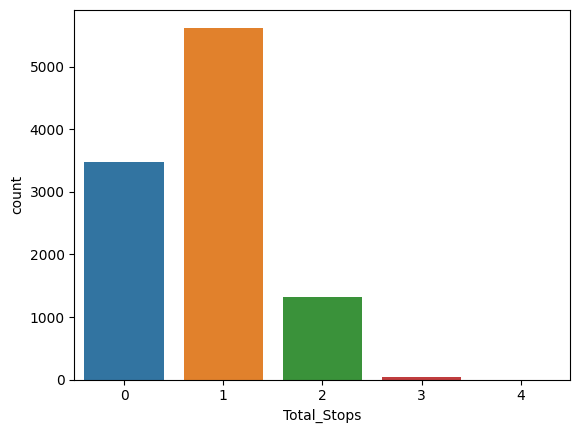

In [55]:
sns.countplot(df, x=df.Total_Stops)

In [46]:
sorted(df['Duration'].unique())

['10h',
 '10h 10m',
 '10h 15m',
 '10h 20m',
 '10h 25m',
 '10h 30m',
 '10h 35m',
 '10h 40m',
 '10h 45m',
 '10h 50m',
 '10h 55m',
 '10h 5m',
 '11h',
 '11h 10m',
 '11h 15m',
 '11h 20m',
 '11h 25m',
 '11h 30m',
 '11h 35m',
 '11h 40m',
 '11h 45m',
 '11h 50m',
 '11h 55m',
 '11h 5m',
 '12h',
 '12h 10m',
 '12h 15m',
 '12h 20m',
 '12h 25m',
 '12h 30m',
 '12h 35m',
 '12h 40m',
 '12h 45m',
 '12h 50m',
 '12h 55m',
 '12h 5m',
 '13h',
 '13h 10m',
 '13h 15m',
 '13h 20m',
 '13h 25m',
 '13h 30m',
 '13h 35m',
 '13h 40m',
 '13h 45m',
 '13h 50m',
 '13h 55m',
 '13h 5m',
 '14h',
 '14h 10m',
 '14h 15m',
 '14h 20m',
 '14h 25m',
 '14h 30m',
 '14h 35m',
 '14h 40m',
 '14h 45m',
 '14h 50m',
 '14h 55m',
 '14h 5m',
 '15h',
 '15h 10m',
 '15h 15m',
 '15h 20m',
 '15h 25m',
 '15h 30m',
 '15h 35m',
 '15h 40m',
 '15h 45m',
 '15h 50m',
 '15h 55m',
 '15h 5m',
 '16h',
 '16h 10m',
 '16h 15m',
 '16h 20m',
 '16h 25m',
 '16h 30m',
 '16h 35m',
 '16h 40m',
 '16h 45m',
 '16h 50m',
 '16h 55m',
 '16h 5m',
 '17h 10m',
 '17h 15m',
 '1

In [47]:
# Find the indices of rows in the Pandas DataFrame 'df' where the 'Duration' column has the value '5m'.
idx = df[df['Duration'] == '5m'].index

In [48]:
# Drop rows from the Pandas DataFrame 'df' where the 'Duration' column has the value '5m'.
# Reset the index of the DataFrame after dropping rows and modify it in-place.
df.drop(idx, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [49]:
# Extract the hours part from the 'Duration' column in the Pandas DataFrame 'df'
# by applying a lambda function that splits each string at 'h' and takes the first part.
df['Hours'] = df['Duration'].apply(lambda x: x.split('h')[0])

In [50]:
# Convert the 'Duration' column value in each row of the DataFrame 'df' to minutes.
# Extract minutes from the 'Duration' string if it exists, otherwise return 0.
def convert_duration(row):
    duration_str = row['Duration']
    
    # Check if the 'Duration' string is longer than 3 characters.
    if len(duration_str) > 3:
        # Extract minutes from the end of the 'Duration' string.
        minutes = duration_str.split()[-1].split('m')[0]
        return minutes
    else:
        # If the 'Duration' string is not longer than 3 characters, return 0.
        return 0

In [51]:
# Applying the function to the 'Duration' column
df['minutes'] = df.apply(convert_duration, axis=1)

In [52]:
# Convert the 'Duration' column in the Pandas DataFrame 'df' to total minutes
# by multiplying the 'Hours' column (converted to integer) by 60 and adding the 'minutes' column (converted to integer).
df['Duration'] = (df['Hours'].astype(int) * 60) + df['minutes'].astype(int)

<Axes: xlabel='Duration', ylabel='Count'>

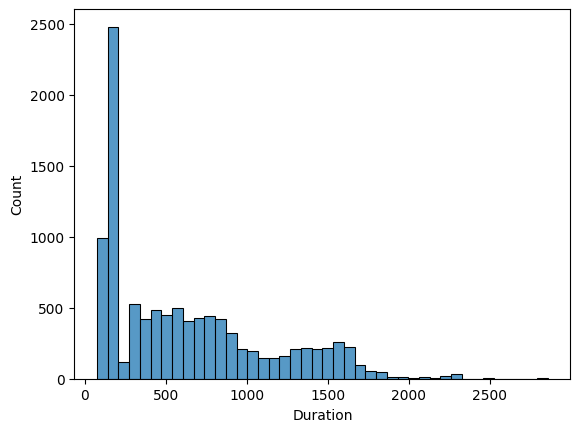

In [57]:
sns.histplot(df, x=df.Duration)

<Axes: xlabel='Duration', ylabel='Price'>

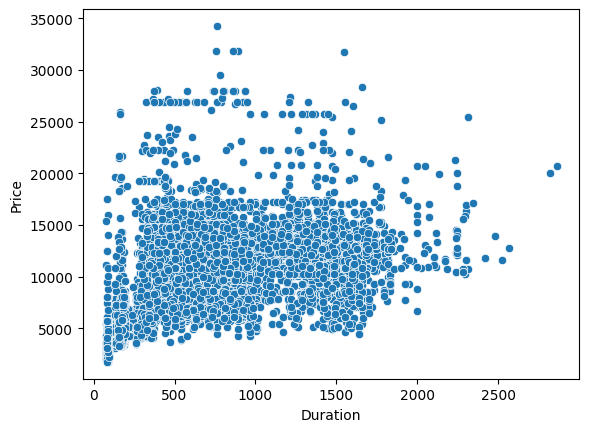

In [71]:
sns.scatterplot(df, x=df.Duration, y=df.Price)

In [65]:
# Find the indices of rows in the Pandas DataFrame 'df' where the 'Price' is greater than 30,000
# and the 'Duration' is less than 750.
idx = df[(df['Price'] > 30000) & (df['Duration'] < 750)].index

In [66]:
# Drop rows from the Pandas DataFrame 'df' where the 'Price' is greater than 30,000
# and the 'Duration' is less than 750.
df.drop(idx, axis=0, inplace=True)

# Reset the index of the DataFrame after dropping rows and modify it in-place.
df.reset_index(drop=True, inplace=True)

<Axes: xlabel='Duration', ylabel='Price'>

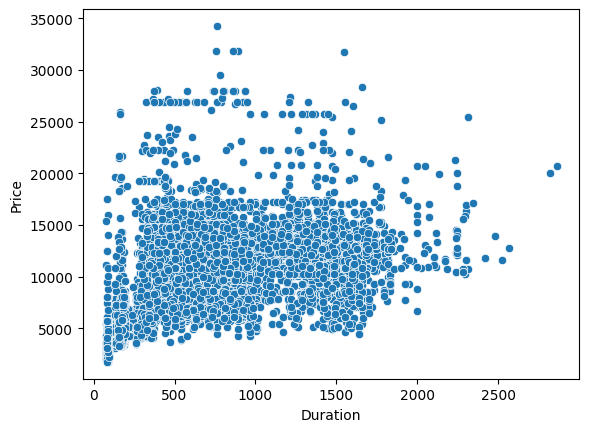

In [72]:
sns.scatterplot(df, x=df.Duration, y=df.Price)

In [68]:
# Find the indices of rows in the Pandas DataFrame 'df' where the 'Price' is less than 10,000
# and the 'Duration' is greater than 2000.
idx = df[(df['Price']<10000)&(df['Duration']>2000)].index

In [69]:
df.drop(idx, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

<Axes: xlabel='Duration', ylabel='Price'>

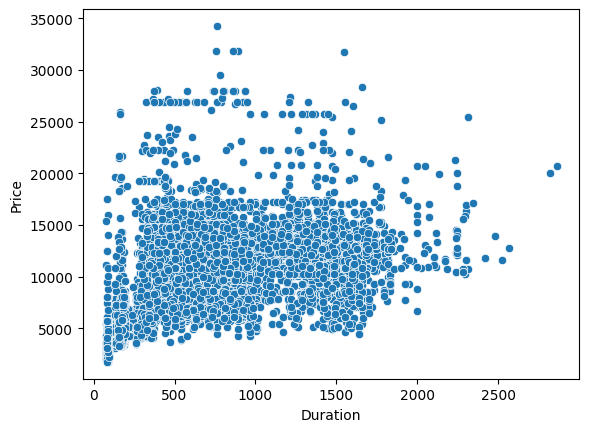

In [73]:
sns.scatterplot(df, x=df.Duration, y=df.Price)

In [74]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month', 'Day', 'Hours', 'minutes'],
      dtype='object')

In [76]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8142
In-flight meal not included     1921
No check-in baggage included     318
1 Long layover                    17
Premium economy                   16
Change airports                    7
No Info                            3
1 Short layover                    1
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [77]:
# Convert all values in the 'Additional_Info' column of the Pandas DataFrame 'df' to lowercase.
df['Additional_Info'] = df['Additional_Info'].apply(lambda x: x.lower())

In [78]:
business = [
    '1 long layover', 'premium economy', 'business class' ,'change airports', '1 short layover', 'red-eye flight', '2 long layover'
]

In [79]:
# Clean the 'Additional_Info' column in the Pandas DataFrame 'df' by categorizing certain values as 'business'.
def clean_Additional_Info(r):
    if r in business:
        return 'business'
    else: 
        return r

In [80]:
df['Additional_Info'] = df['Additional_Info'].apply(clean_Additional_Info)

In [81]:
df['Additional_Info'].value_counts()

Additional_Info
no info                         8145
in-flight meal not included     1921
no check-in baggage included     318
business                          44
Name: count, dtype: int64

<Axes: xlabel='Additional_Info', ylabel='count'>

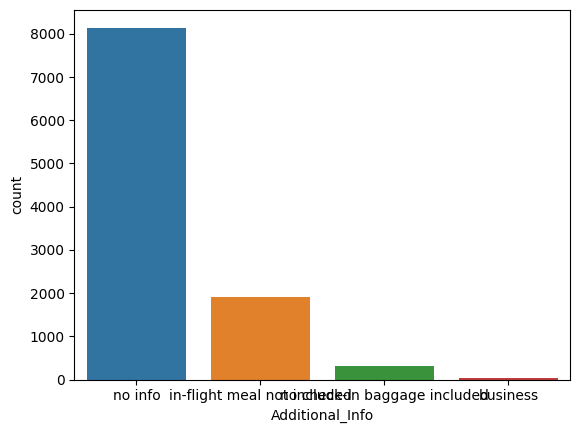

In [82]:
sns.countplot(df, x=df.Additional_Info)

In [88]:
df.groupby(df.Additional_Info).Price.mean()

Additional_Info
business                        16853.704545
in-flight meal not included      9436.826132
no check-in baggage included     3642.465409
no info                          9016.319091
Name: Price, dtype: float64

In [89]:
df['Price'].describe()

count    10428.000000
mean      8962.977465
std       4338.033865
min       1759.000000
25%       5224.000000
50%       8258.000000
75%      12312.500000
max      34273.000000
Name: Price, dtype: float64

<Axes: xlabel='Price'>

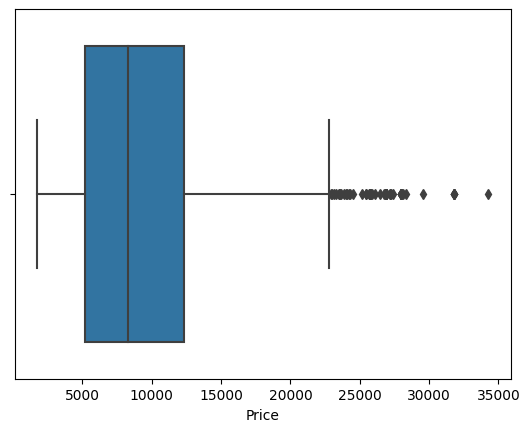

In [90]:
sns.boxplot(df, x='Price')

In [92]:
df['Month'].value_counts()

Month
May      3393
June     3308
March    2650
April    1077
Name: count, dtype: int64

<Axes: xlabel='Month', ylabel='count'>

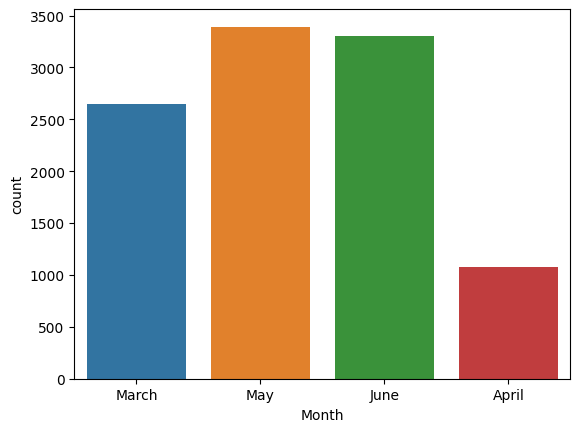

In [93]:
sns.countplot(df, x=df.Month)

In [61]:
df['Day'].value_counts()

Day
Wednesday    2046
Monday       1807
Thursday     1774
Saturday     1623
Sunday       1449
Friday        908
Tuesday       853
Name: count, dtype: int64

<Axes: xlabel='Day', ylabel='count'>

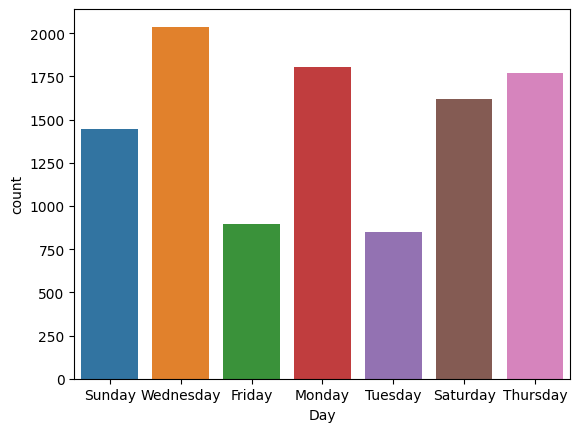

In [94]:
sns.countplot(df, x=df.Day)

In [95]:
# Drop specified columns from the Pandas DataFrame 'df'.
df.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Hours', 'minutes'], axis=1, inplace=True)

In [96]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,Banglore,New Delhi,170,0,no info,3897,March,Sunday
1,Air India,Kolkata,Banglore,445,2,no info,7662,May,Wednesday
2,Jet Airways,Delhi,Cochin,1140,2,no info,13882,June,Sunday
3,IndiGo,Kolkata,Banglore,325,1,no info,6218,May,Sunday
4,IndiGo,Banglore,New Delhi,285,1,no info,13302,March,Friday
...,...,...,...,...,...,...,...,...,...
10423,Air Asia,Kolkata,Banglore,150,0,no info,4107,April,Tuesday
10424,Air India,Kolkata,Banglore,155,0,no info,4145,April,Saturday
10425,Jet Airways,Banglore,Delhi,180,0,no info,7229,April,Saturday
10426,Vistara,Banglore,New Delhi,160,0,no info,12648,March,Friday


In [97]:
# Calculate the total number of duplicated rows in the Pandas DataFrame 'df'.
df.duplicated().sum()

1510

In [98]:
# Remove duplicated rows from the DataFrame.
df.drop_duplicates(inplace=True)

# Reset the index of the DataFrame after removing duplicates and modify it in-place.
df.reset_index(drop=True, inplace=True)

In [102]:
cols_to_encode = ['Airline', 'Source', 'Destination', 'Additional_Info', 'Month', 'Day']

In [103]:
# Create a ColumnTransformer named 'encoder' using BinaryEncoder for specified columns and preserving other columns.
encoder = ColumnTransformer(transformers=[('BE', BinaryEncoder(), cols_to_encode)], remainder='passthrough')

In [104]:
# Separate the features (x) and target variable (y) in the Pandas DataFrame 'df'.
x = df.drop('Price', axis=1)
y = df['Price']

In [105]:
# Create a list of tuples, each containing a model name and its corresponding regression algorithm instance.
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
#models.append(('SVR', SVR(gamma='auto')))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBRegressor()))

In [106]:
# Iterate over regression models.
for model in models:
    # Create a list of pipeline steps, including encoding, scaling, and the current model.
    steps = []
    steps.append(('encoder', encoder))
    steps.append(('scaler', RobustScaler()))
    steps.append(model)
    
    # Create a pipeline with the specified steps.
    pipeline = Pipeline(steps=steps)
    
    # Perform cross-validation and store the results in the 'result' variable.
    result = cross_validate(pipeline, x, y, cv=5, scoring='r2', return_train_score=True, error_score='raise')
    
    # Print the name of the current model.
    print(model[0])
    
    # Print the mean R-squared score for training data.
    print(f"Train Accuracy: {result['train_score'].mean()}")
    
    # Print the mean R-squared score for testing data.
    print(f"Test Accuracy: {result['test_score'].mean()}")
    
    # Print a line of dashes for separation.
    print('-' * 70)


LR
Train Acuracy : 0.5728154588642813
Test Acuracy : 0.5718463718286025
----------------------------------------------------------------------
KNN
Train Acuracy : 0.847219574853726
Test Acuracy : 0.7650270972928737
----------------------------------------------------------------------
SVR
Train Acuracy : 0.04426310923161179
Test Acuracy : 0.04099686625865584
----------------------------------------------------------------------
DT
Train Acuracy : 0.9551009935956619
Test Acuracy : 0.6644308524773923
----------------------------------------------------------------------
RF
Train Acuracy : 0.9380812590019734
Test Acuracy : 0.7786199718232801
----------------------------------------------------------------------
XGB
Train Acuracy : 0.9034079786427706
Test Acuracy : 0.8133721800873779
----------------------------------------------------------------------


In [107]:
# Create a list of pipeline steps, including encoding, scaling, and the XGBRegressor model.
steps = []
steps.append(('encoder', encoder))
steps.append(('scaler', RobustScaler()))
steps.append(('XGB', XGBRegressor()))

# Create a pipeline with the specified steps.
pipeline = Pipeline(steps=steps)

In [108]:
pipeline

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('BE', BinaryEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Additional_Info', 'Month',
                                                   'Day'])])),
                ('scaler', RobustScaler()),
                ('XGB',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_ro...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [124]:
# Define a list of dictionaries containing hyperparameter grids for tuning the XGBRegressor model.
params = [
    {'XGB__n_estimators': range(75, 95), 'XGB__max_depth': [4, 5, 6, 7]}
]

In [125]:
# Create a GridSearchCV object using the specified pipeline, hyperparameter grid, and cross-validation settings.
grid = GridSearchCV(estimator=pipeline, param_grid=params, cv=5, return_train_score=True, scoring='r2')

In [126]:
# Fit the GridSearchCV object to the features 'x' and target variable 'y'.
grid.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('BE',
                                                                         BinaryEncoder(),
                                                                         ['Airline',
                                                                          'Source',
                                                                          'Destination',
                                                                          'Additional_Info',
                                                                          'Month',
                                                                          'Day'])])),
                                       ('scaler', RobustScaler()),
                                       ('XGB',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_b...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             param_grid=[{'XGB__max_depth': [6, 7],
                          'XGB__n_estimators': range(80, 85)}],
             return_train_score=True, scoring='r2')

In [127]:
# Retrieve the best hyperparameters from the GridSearchCV results.
grid.best_params_

{'XGB__max_depth': 6, 'XGB__n_estimators': 82}

In [128]:
# Retrieve the maximum mean training score from the cross-validation results in the GridSearchCV object.
grid.cv_results_["mean_train_score"].max()

0.9200352264672407

In [129]:
# Retrieve the maximum mean test score from the cross-validation results in the GridSearchCV object.
grid.cv_results_['mean_test_score'].max()

0.8153689461162898

In [130]:
# Create a list of pipeline steps with specific hyperparameters for the XGBRegressor model.
steps = []
steps.append(('encoder', encoder))
steps.append(('scaler', RobustScaler()))
steps.append(('XGB', XGBRegressor(n_estimators=82, max_depth=6)))

# Create a pipeline with the specified steps and hyperparameters.
pipeline = Pipeline(steps=steps)

In [131]:
# Fit the pipeline to the features 'x' and target variable 'y'.
pipeline.fit(x, y)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('BE', BinaryEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Additional_Info', 'Month',
                                                   'Day'])])),
                ('scaler', RobustScaler()),
                ('XGB',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_ro...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=82,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [133]:
# Save the column names of the features ('x') to a joblib file named 'inputs.pkl'.
joblib.dump(x.columns, 'inputs.pkl')

['inputs.pkl']

In [134]:
# Save the trained pipeline (including the XGBRegressor model) to a joblib file named 'model.pkl'.
joblib.dump(pipeline, 'model.pkl')

['model.pkl']

In [135]:
%%writefile Flights.py

import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from category_encoders import BinaryEncoder
from xgboost import XGBRegressor
import joblib

# Save the column names of the features to a joblib file for later use.
columns = joblib.load('inputs.pkl')

# Load the trained pipeline model from a joblib file.
model = joblib.load('model.pkl')

# Function to make a flight price prediction based on user input.
def prediction(Airline, Source, Destination, Duration, Total_Stops, Additional_Info, Month, Day):
    df = pd.DataFrame(columns=columns)
    
    # Set the input values in the DataFrame for prediction.
    df.at[0, 'Airline'] = Airline
    df.at[0, 'Source'] = Source
    df.at[0, 'Destination'] = Destination
    df.at[0, 'Duration'] = Duration
    df.at[0, 'Total_Stops'] = Total_Stops
    df.at[0, 'Additional_Info'] = Additional_Info
    df.at[0, 'Month'] = Month
    df.at[0, 'Day'] = Day
    
    # Use the trained model to make the prediction.
    prediction = model.predict(df)
    return int(prediction[0])

# Main function to create a Streamlit web app for flight price prediction.
def main():
    st.title('Indian Air Flight Price Prediction')
    
    # User input fields for various features.
    Airline = st.selectbox('Airline', ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia'])
    
    Source = st.selectbox('Source', ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'])
    
    Destination = st.selectbox('Destination', ['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'])
    
    Duration = st.slider('Duration', min_value=70, max_value=3000, step=1, value=360)
    
    Total_Stops = st.slider('Total_Stops', min_value=0, max_value=5, step=1, value=0)
    
    Additional_Info = st.selectbox('Additional_Info', ['no info', 'in-flight meal not included',
       'no check-in baggage included', 'business'])
    
    Month = st.selectbox('Month', ['March', 'April', 'May', 'June'])
    
    Day = st.selectbox('Day', ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    
    # Button to trigger the prediction.
    if st.button("Predict"):
        result = prediction(Airline, Source, Destination, Duration, Total_Stops, Additional_Info, Month, Day)
        st.text(f"The expected Price for this Flight is  : {int(result) + 1}")

# Run the Streamlit app.
main()


Overwriting Flights.py
